In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## This week’s topic: Software jobs

Many high-tech companies have seen their stock prices go down quite a bit in the last year. Perhaps to bolster their stock prices, perhaps to get ready for a potential recession, and perhaps because they can get away with it, many of them have been laying people off. There's a constant stream of reports about high-tech companies laying off thousands, and sometimes tens of thousands, of employees.

In the good times, programmers who are laid off don't have to worry that much about getting a new job. Right now, though, it feels like it'll be harder.

But is it? Are things really bad right now for programmers who want to find a new job? How much does this differ from other sectors? And do we see a big difference between countries?

### Data

This week, we'll look at numbers from Indeed.com, a major job-listing site. Their [HiringLab organization](https://hiringlab.org/) grabs data both from Indeed.com and also from elsewhere on the Internet, and then makes aggregate job information available.

The assumption is that most job postings on Indeed.com points to greater demand for workers. All of Indeed's metrics start in February 2020, which is set to be a baseline value of 100.

Note that we aren't measuring the absolute number of job postings! Rather, we're measuring the number of postings relative to February 2020. So if the value for a given week is 100, that doesn't mean there were 100 job postings; rather, it means that we’re seeing the same number as in February 2020.

Also note that this isn’t a direct measure of employment. More job postings doesn’t necessarily mean lower employment, although I’m pretty sure there’s a correlation there.

Our data source will be a GitHub repo created by HiringLab, which they seem to update weekly with job-posting details. If you’re experienced with Git, then you’ll want to download the entire repository with “git clone”:

https://github.com/hiring-lab/job_postings_tracker

If you aren’t familiar with Git, then you can use this URL to get the data as a zipfile:

https://github.com/hiring-lab/job_postings_tracker/archive/refs/heads/master.zip

We’ll be looking at two different metrics — the aggregate data information for the entire US, in the file “US/aggregate_job_postings_US.csv”, and then the per-country information for each job sector. In the US, that information will be in the file “US/job_postings_by_sector_US.csv”.

### Tasks

Here’s what I would like you to do:

1. Turn aggregate job postings into a data frame (aggregate_df). We're interested in the date and seasonally adjusted number of job postings, but only where “variable” is “total postings”.
2. On how many days since data collection began has the index been greater than 100 (i.e., more postings than in February 2020)?
3. Draw a line plot with the posting index per day.
4. Create a second data frame (sector_df) from the job_postings_by_sector_US file. We're interested in the date, postings_index, and display_name columns.
5. Reformat the data such that the index contains the date, and the columns are the various sectors.
6. On how many days since data collection began has the index for software development been greater than 100 (i.e., more postings than in February 2020)?
7. Draw a line plot with the posting index for software development per day.
8. On how many days since January 1st, 2023, has the index for software development been greater than 100 (i.e., more postings than in February 2020)?
9. Which two sectors' job-posting indexes are most highly correlated with software development? Which two are least correlated with software development?
10. Create a line plot, showing software job openings vs. the aggregate index.
11. Create a line plot, showing software job openings in the US vs. those in Australia, Canada, Germany, France, and Great Britain.

This week’s learning goals include working with multiple CSV files, plotting, grouping, time series, and pivot tables.






In [2]:
url = "https://github.com/hiring-lab/job_postings_tracker/archive/refs/heads/master.zip"

#### 1. Turn aggregate job postings into a data frame (aggregate_df). We're interested in the date and seasonally adjusted number of job postings, but only where “variable” is “total postings”.

In [4]:
# download zipfile from url into local data directory
import urllib.request
import zipfile
import os

# create data dir
os.mkdir("data")

# download the zip file
urllib.request.urlretrieve(url, "data/job_postings_tracker.zip")

# unzip the file
with zipfile.ZipFile("data/job_postings_tracker.zip", "r") as zip_ref:
    zip_ref.extractall("data/")
    

Note that there are also two columns containing data. I decided that we would only look at the seasonally adjusted data, which takes into consideration the fact that certain jobs are seasonal

In [2]:
dfs = []
for csv_file in Path("data").rglob("aggregate_job_postings_*.csv"):
    dfs.append(
        pd.read_csv(
            csv_file,
            usecols=[0, 1, 2, 4],
            parse_dates=["date"],
            names=["date", "country", "postings_index", "variable"],
            header=1,
            index_col=["date", "country"],
        )
    )

In [27]:
len(dfs)

7

In [3]:
df_aggregate = pd.concat(dfs)
df_aggregate = df_aggregate.sort_index(level=["date", "country"])

In [37]:
df_aggregate.variable.value_counts()

variable
new postings      10192
total postings    10185
Name: count, dtype: int64

In [4]:
df_aggregate = df_aggregate.query("variable == 'total postings'")

In [40]:
df_aggregate

postings_index        variable
date       country                                
2020-02-02 AU               100.06  total postings
           CA               100.08  total postings
           DE               100.01  total postings
           FR                99.93  total postings
           GB                99.95  total postings
...                            ...             ...
2024-01-26 DE               130.49  total postings
           FR               152.52  total postings
           GB                95.53  total postings
           IE               122.76  total postings
           US               121.32  total postings

[10185 rows x 2 columns]

#### 2. On how many days since data collection began has the index been greater than 100 (i.e., more postings than in February 2020)?

In [65]:
(df_aggregate.droplevel("country")["postings_index"] > 100).sum() # for all countries!

7402

In [58]:
df_aggregate.groupby("date")["postings_index"].agg(lambda x: (x > 100).any())

date
2020-02-02    True
2020-02-03    True
2020-02-04    True
2020-02-05    True
2020-02-06    True
              ... 
2024-01-22    True
2024-01-23    True
2024-01-24    True
2024-01-25    True
2024-01-26    True
Name: postings_index, Length: 1455, dtype: bool

In [70]:
df_aggregate.groupby("country")["postings_index"].agg(lambda x: (x > 100).sum() / len(x))

country
AU    0.817869
CA    0.770447
DE    0.729897
FR    0.674914
GB    0.667354
IE    0.668729
US    0.758076
Name: postings_index, dtype: float64

#### 3. Draw a line plot with the posting index per day.

<Axes: xlabel='date'>

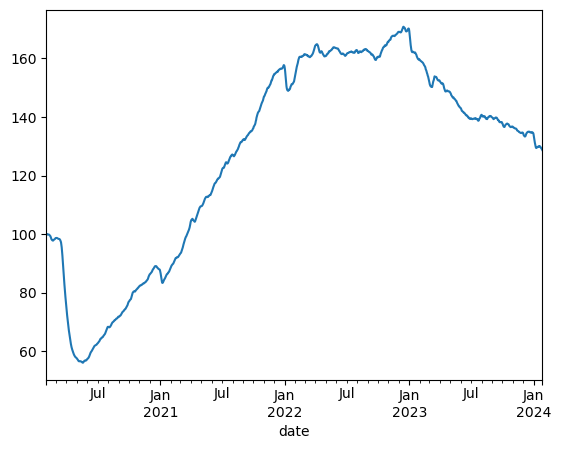

In [37]:
df_aggregate.reset_index(level="country").groupby("date")[
    "postings_index"
].mean().plot()

country
AU    Axes(0.125,0.11;0.775x0.77)
CA    Axes(0.125,0.11;0.775x0.77)
DE    Axes(0.125,0.11;0.775x0.77)
FR    Axes(0.125,0.11;0.775x0.77)
GB    Axes(0.125,0.11;0.775x0.77)
IE    Axes(0.125,0.11;0.775x0.77)
US    Axes(0.125,0.11;0.775x0.77)
Name: postings_index, dtype: object

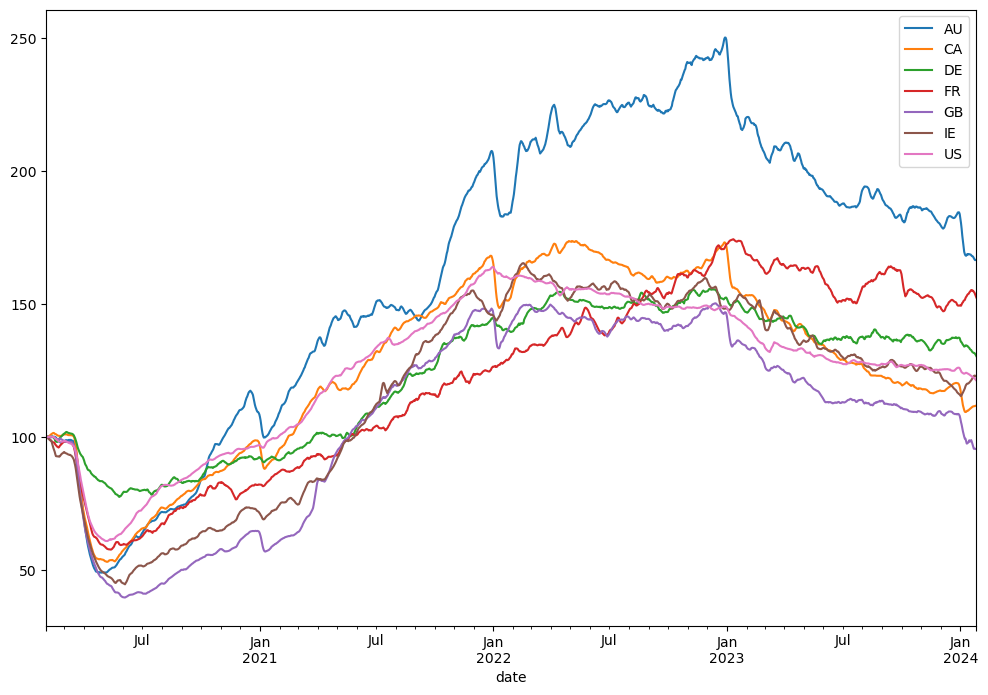

In [30]:
plt.figure(figsize=(12, 8))

df_aggregate.reset_index(level="country").groupby("country")["postings_index"].plot(legend=True)

<Axes: xlabel='date'>

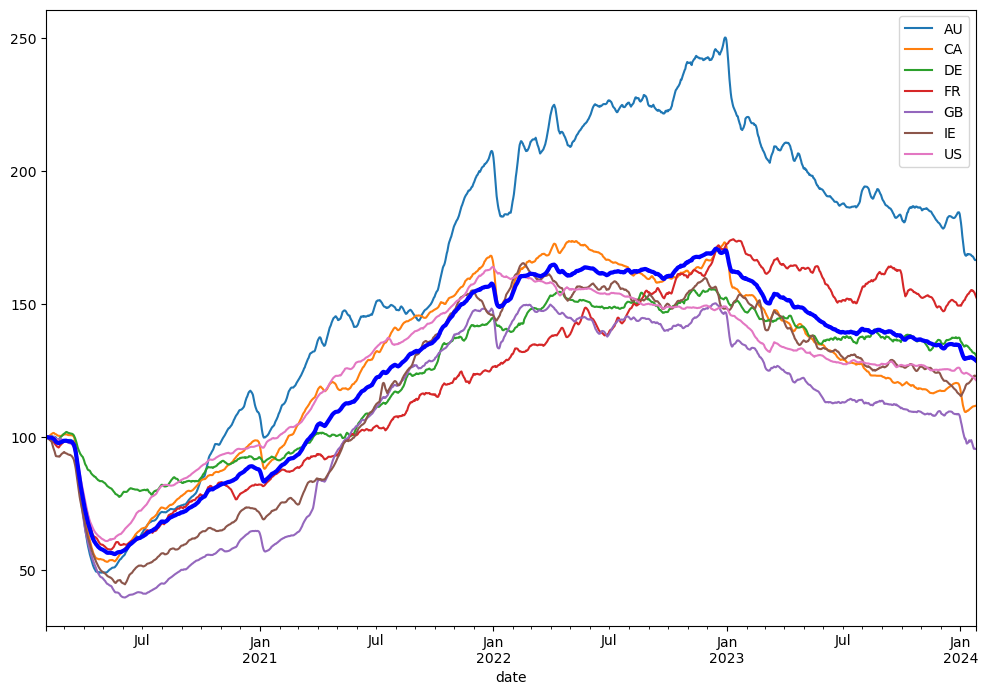

In [38]:
plt.figure(figsize=(12, 8))

df_aggregate.reset_index(level="country").groupby("country")["postings_index"].plot(
    legend=True
)

df_aggregate.reset_index(level="country").groupby("date")[
    "postings_index"
].mean().plot(color="blue", linewidth=3)

#### 4. Create a second data frame (sector_df) from the job_postings_by_sector_US file. We're interested in the date, postings_index, and display_name columns.

In [62]:
df_sector = pd.read_csv(
    "./data/job_postings_tracker-master/US/job_postings_by_sector_US.csv",
    usecols=[0, 2, 4],
    parse_dates=["date"],
    names=["date", "postings_index", "sector"],
    header=1,
    index_col=["date"],
)

#### 5. Reformat the data such that the index contains the date, and the columns are the various sectors.

In [50]:
df_sector.head()

,postings_index,sector
date,,
2020-02-02,99.85,Accounting
2020-02-03,99.68,Accounting
2020-02-04,99.52,Accounting
2020-02-05,99.48,Accounting
2020-02-06,99.55,Accounting


In [51]:
df_sector.sector.value_counts()

sector
Mathematics                           1456
Sales                                 1456
Media & Communications                1456
Medical Information                   1456
Nursing                               1456
Medical Technician                    1456
Beauty & Wellness                     1456
Pharmacy                              1456
Project Management                    1456
Security & Public Safety              1456
Retail                                1456
Cleaning & Sanitation                 1456
Dental                                1456
Scientific Research & Development     1456
Community & Social Service            1456
Sports                                1456
IT Operations & Helpdesk              1456
Information Design & Documentation    1456
Software Development                  1456
Therapy                               1456
Logistic Support                      1456
Veterinary                            1456
Physicians & Surgeons                 1456
Load

In [69]:
df_sector = df_sector.pivot(columns="sector")["postings_index"] # index and values is not needed here

#### 6. On how many days since data collection began has the index for software development been greater than 100 (i.e., more postings than in February 2020)?

In [75]:
df_sector["Software Development"].apply(lambda x: (x > 100)).value_counts(normalize=True)

Software Development
True     0.549451
False    0.450549
Name: proportion, dtype: float64

#### 7. Draw a line plot with the posting index for software development per day.

<Axes: xlabel='date'>

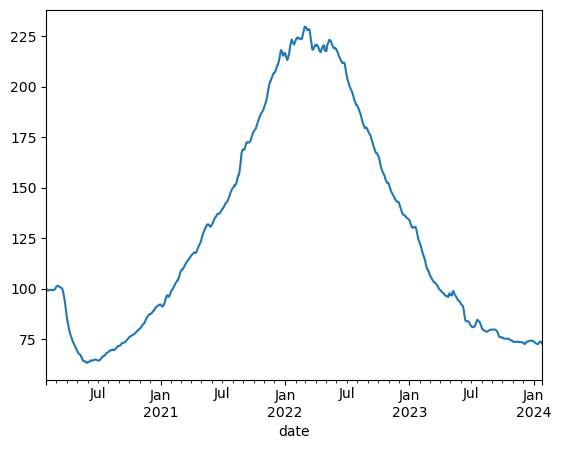

In [81]:
df_sector["Software Development"].plot()

#### 8. On how many days since January 1st, 2023, has the index for software development been greater than 100 (i.e., more postings than in February 2020)?

In [84]:
(df_sector.loc["2023-01-01":, "Software Development"] > 100).value_counts(
    normalize=True
)

Software Development
False    0.777494
True     0.222506
Name: proportion, dtype: float64

#### 9. Which two sectors' job-posting indexes are most highly correlated with software development? Which two are least correlated with software development?

In [94]:
df_sector.corr(method="pearson")["Software Development"].sort_values(ascending=False).head(10)

sector
Software Development                  1.000000
Mathematics                           0.994325
Information Design & Documentation    0.991567
Media & Communications                0.969806
Marketing                             0.967448
Banking & Finance                     0.966037
IT Operations & Helpdesk              0.964281
Human Resources                       0.964021
Scientific Research & Development     0.948982
Industrial Engineering                0.904485
Name: Software Development, dtype: float64

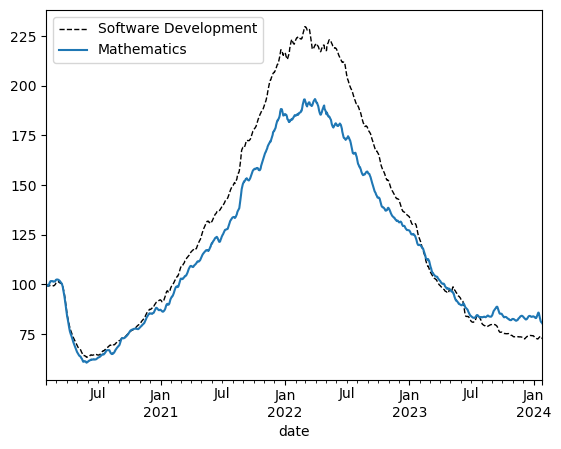

In [102]:
df_sector["Software Development"].plot(color="black", linewidth=1, linestyle="--")
df_sector["Mathematics"].plot()
plt.legend()

In [95]:
df_sector.corr(method="pearson")["Software Development"].sort_values(
    ascending=False
).tail(10)

sector
Veterinary                     0.573583
Personal Care & Home Health    0.571526
Education & Instruction        0.547152
Driving                        0.421914
Sports                         0.406891
Therapy                        0.390551
Beauty & Wellness              0.347610
Dental                         0.343547
Civil Engineering              0.341367
Physicians & Surgeons          0.312473
Name: Software Development, dtype: float64

In [106]:
df_sector.corr()["Software Development"].sort_values(ascending=False).iloc[[1,2, -2, -1]]

sector
Mathematics                           0.994325
Information Design & Documentation    0.991567
Civil Engineering                     0.341367
Physicians & Surgeons                 0.312473
Name: Software Development, dtype: float64

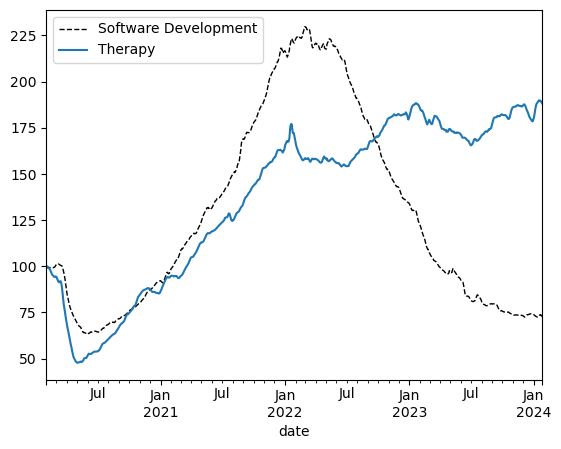

In [103]:
df_sector["Software Development"].plot(color="black", linewidth=1, linestyle="--")
df_sector["Therapy"].plot()
plt.legend()

<Axes: xlabel='sector', ylabel='sector'>

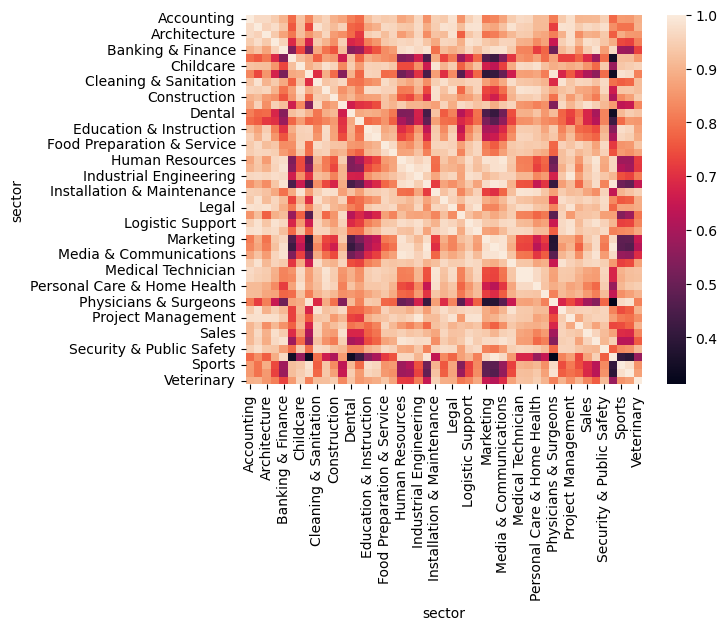

In [87]:
sns.heatmap(df_sector.corr())

#### 10. Create a line plot, showing software job openings vs. the aggregate index.

In [111]:
df_merged = df_aggregate.xs("US", level="country").join(df_sector["Software Development"])

In [112]:
df_merged.head()

,postings_index,variable,Software Development
date,,,
2020-02-02,99.98,total postings,99.75
2020-02-03,99.97,total postings,99.55
2020-02-04,100.03,total postings,99.29
2020-02-05,100.12,total postings,99.22
2020-02-06,100.24,total postings,99.12


<Axes: xlabel='date'>

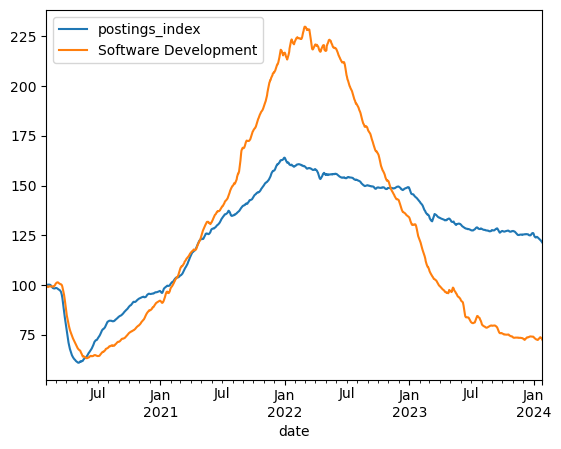

In [113]:
df_merged.plot()

#### 11. Create a line plot, showing software job openings in the US vs. those in Australia, Canada, Germany, France, and Great Britain.

#### Bonus

/var/folders/x_/pp_bgvrn2qn_kh8n569y1gch0000gn/T/ipykernel_36484/1705702281.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_sector.plot(subplots=True, ax=ax)


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='d

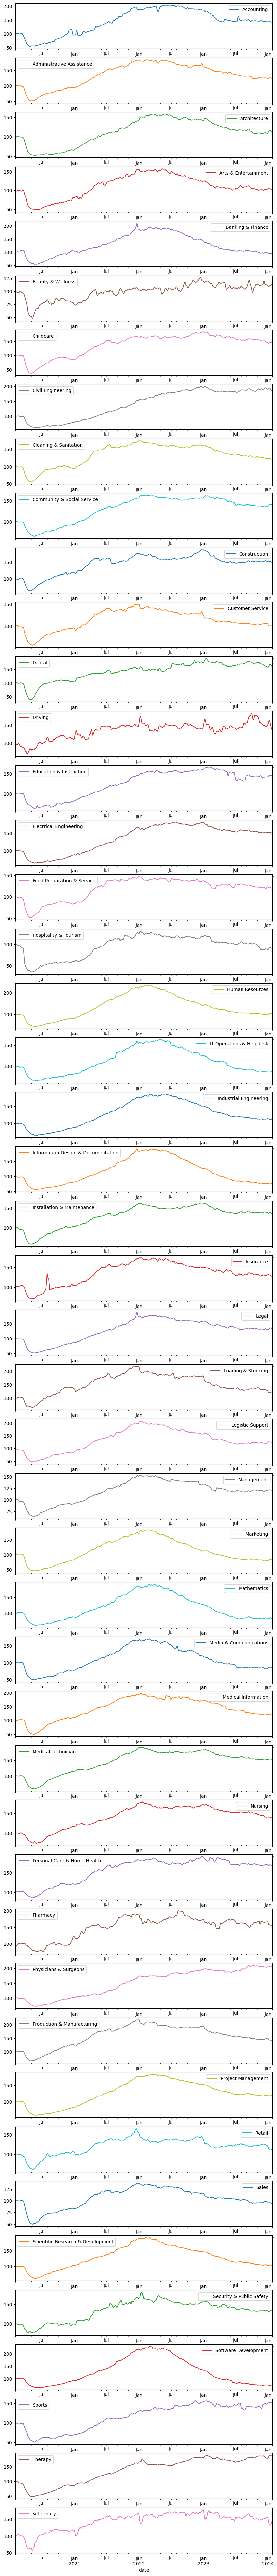

In [120]:
fig = plt.figure(figsize=(10, 100))
ax = fig.gca()

df_sector.plot(subplots=True, ax=ax)